In [1]:
###  Problem statement: predicting turbine energy yield (TEY) using ambient variables as features.


In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, KFold
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam


In [3]:
df=pd.read_csv("C:/Users/Vijay Rathod/Downloads/gas_turbines.csv")
df

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [5]:
df.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [6]:
df.corr()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
AT,1.000000,-0.412953,-0.549432,-0.099333,-0.049103,0.093067,0.338569,-0.207495,-0.100705,-0.088588,-0.600006
AP,-0.412953,1.000000,0.042573,0.040318,0.078575,0.029650,-0.223479,0.146939,0.131198,0.041614,0.256744
AH,-0.549432,0.042573,1.000000,-0.119249,-0.202784,-0.247781,0.010859,-0.110272,-0.182010,0.165505,0.143061
AFDP,-0.099333,0.040318,-0.119249,1.000000,0.744251,0.627254,-0.571541,0.717995,0.727152,-0.334207,-0.037299
GTEP,-0.049103,0.078575,-0.202784,0.744251,1.000000,0.874526,-0.756884,0.977042,0.993784,-0.508259,-0.208496
TIT,0.093067,0.029650,-0.247781,0.627254,0.874526,1.000000,-0.357320,0.891587,0.887238,-0.688272,-0.231636
TAT,0.338569,-0.223479,0.010859,-0.571541,-0.756884,-0.357320,1.000000,-0.720356,-0.744740,0.063404,0.009888
TEY,-0.207495,0.146939,-0.110272,0.717995,0.977042,0.891587,-0.720356,1.000000,0.988473,-0.541751,-0.102631
CDP,-0.100705,0.131198,-0.182010,0.727152,0.993784,0.887238,-0.744740,0.988473,1.000000,-0.520783,-0.169103
CO,-0.088588,0.041614,0.165505,-0.334207,-0.508259,-0.688272,0.063404,-0.541751,-0.520783,1.000000,0.316743


In [7]:
df.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


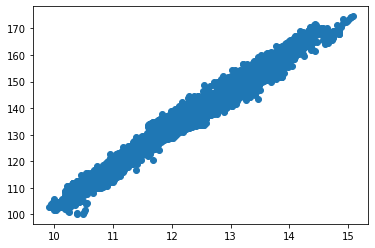

In [8]:
import matplotlib.pyplot as plt
plt.scatter(x="CDP",y="TEY",data=df)#which is linerly co-related

<AxesSubplot:>

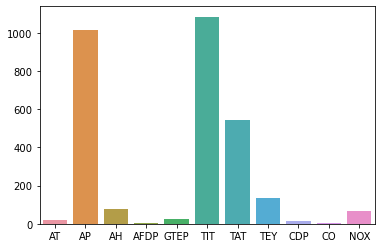

In [9]:
sns.barplot(data=df)

(array([ 247., 2671.,  474.,  528., 7145.,  462.,  989., 1215., 1160.,
         148.]),
 array([100.17 , 107.614, 115.058, 122.502, 129.946, 137.39 , 144.834,
        152.278, 159.722, 167.166, 174.61 ]),
 <BarContainer object of 10 artists>)

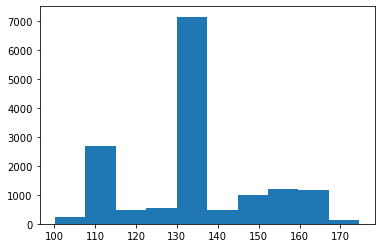

In [10]:
plt.hist(df['TEY'])

In [11]:
# split into input (X) and output (Y) variables
df1 = df.drop('TEY',axis=1)
df1

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,10.533,6.2494,93.227


In [12]:
finalDf = pd.concat([pd.DataFrame(df1),
                     df[['TEY']]], axis = 1)
finalDf

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX,TEY
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722,114.70
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776,114.72
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468,114.71
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670,114.72
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311,114.72
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,10.400,4.5186,79.559,111.61
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,10.433,4.8470,79.917,111.78
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,10.483,7.9632,90.912,110.19
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,10.533,6.2494,93.227,110.74


In [13]:
# split into input (X) and output (Y) variables
array = finalDf.values
X = array[:,0:10]
Y = array[:,10]
X.reshape(-1,1)
Y.reshape(-1,1)

array([[114.7 ],
       [114.72],
       [114.71],
       ...,
       [110.19],
       [110.74],
       [111.58]])

In [14]:
a = StandardScaler()
a.fit(X)
X_standardized = a.transform(X)

In [15]:
# create model
model = Sequential()
model.add(Dense(12, input_dim=10,  activation='relu'))
model.add(Dense(8,  activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [16]:
# Compile model
model.compile(loss='mean_squared_error', optimizer='adam')

In [17]:
# Fit the model
history = model.fit(X, Y, validation_split=0.25, epochs=150, batch_size=10)

Epoch 1/150
1128/1128 [==============================] - 2s 1ms/step - loss: 18507.7852 - val_loss: 17505.1719
Epoch 2/150
1128/1128 [==============================] - 1s 1ms/step - loss: 18507.7793 - val_loss: 17505.1719
Epoch 3/150
1128/1128 [==============================] - 1s 1ms/step - loss: 18507.7910 - val_loss: 17505.1719
Epoch 4/150
1128/1128 [==============================] - 1s 1ms/step - loss: 18507.7793 - val_loss: 17505.1719
Epoch 5/150
1128/1128 [==============================] - 1s 1ms/step - loss: 18507.7637 - val_loss: 17505.1719
Epoch 6/150
1128/1128 [==============================] - 1s 1ms/step - loss: 18507.7676 - val_loss: 17505.1719
Epoch 7/150
1128/1128 [==============================] - 1s 1ms/step - loss: 18507.7773 - val_loss: 17505.1719
Epoch 8/150
1128/1128 [==============================] - 1s 1ms/step - loss: 18507.7812 - val_loss: 17505.1719
Epoch 9/150
1128/1128 [==============================] - 1s 1ms/step - loss: 18507.7734 - val_loss: 17505.1719
E

In [18]:
### Evalute the model
scores=model.evaluate(X,Y)


470/470 [==============================] - 0s 914us/step - loss: 18257.1094


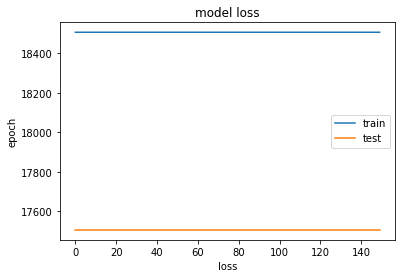

In [20]:
#summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('loss')
plt.ylabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [22]:
### Hyperparameter Tuning 

In [21]:
def create_model():
    model=Sequential()
    model.add(Dense(12,input_dim=8,activation="relu"))
    model.add(Dense(8,activation="relu"))
    model.add(Dense(1,activation="sigmoid"))
    adam=Adam(lr=0.01)
    model.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])
    return model
### Create model
model=KerasClassifier(build_fn=create_model,verbose=0)
batch_size=[10,20,40]
epochs=[10,50,100]
param_grid=dict(batch_size=batch_size,epochs=epochs)
grid=GridSearchCV(estimator=model,param_grid=param_grid,cv=KFold(),verbose=10)
grid_result=grid.fit(X_standardized,Y)

C:\Users\VIJAYR~1\AppData\Local\Temp/ipykernel_9180/2035308421.py:10: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model=KerasClassifier(build_fn=create_model,verbose=0)
C:\Users\Vijay Rathod\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
C:\Users\Vijay Rathod\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Vijay Rathod\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Vijay Rathod\a

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=10, epochs=10....................................
[CV 1/5; 1/9] END .......batch_size=10, epochs=10;, score=nan total time=   0.0s
[CV 2/5; 1/9] START batch_size=10, epochs=10....................................
[CV 2/5; 1/9] END .......batch_size=10, epochs=10;, score=nan total time=   0.0s
[CV 3/5; 1/9] START batch_size=10, epochs=10....................................


C:\Users\Vijay Rathod\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Vijay Rathod\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Vijay Rathod\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 236, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Vijay Rathod\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\Vijay Rathod\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\VIJAYR~1\AppData\Local\Temp\__autograph_generated_filep02

[CV 3/5; 1/9] END .......batch_size=10, epochs=10;, score=nan total time=   0.0s
[CV 4/5; 1/9] START batch_size=10, epochs=10....................................
[CV 4/5; 1/9] END .......batch_size=10, epochs=10;, score=nan total time=   0.0s
[CV 5/5; 1/9] START batch_size=10, epochs=10....................................
[CV 5/5; 1/9] END .......batch_size=10, epochs=10;, score=nan total time=   0.0s
[CV 1/5; 2/9] START batch_size=10, epochs=50....................................


C:\Users\Vijay Rathod\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
C:\Users\Vijay Rathod\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Vijay Rathod\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Vijay Rathod\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 236, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Vijay Rathod\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\Vijay Ratho

[CV 1/5; 2/9] END .......batch_size=10, epochs=50;, score=nan total time=   0.0s
[CV 2/5; 2/9] START batch_size=10, epochs=50....................................
[CV 2/5; 2/9] END .......batch_size=10, epochs=50;, score=nan total time=   0.0s
[CV 3/5; 2/9] START batch_size=10, epochs=50....................................
[CV 3/5; 2/9] END .......batch_size=10, epochs=50;, score=nan total time=   0.0s
[CV 4/5; 2/9] START batch_size=10, epochs=50....................................


C:\Users\Vijay Rathod\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Vijay Rathod\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Vijay Rathod\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 236, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Vijay Rathod\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\Vijay Rathod\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\VIJAYR~1\AppData\Local\Temp\__autograph_generated_filep02

[CV 4/5; 2/9] END .......batch_size=10, epochs=50;, score=nan total time=   0.0s
[CV 5/5; 2/9] START batch_size=10, epochs=50....................................
[CV 5/5; 2/9] END .......batch_size=10, epochs=50;, score=nan total time=   0.0s
[CV 1/5; 3/9] START batch_size=10, epochs=100...................................
[CV 1/5; 3/9] END ......batch_size=10, epochs=100;, score=nan total time=   0.0s
[CV 2/5; 3/9] START batch_size=10, epochs=100...................................


C:\Users\Vijay Rathod\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Vijay Rathod\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Vijay Rathod\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 236, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Vijay Rathod\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\Vijay Rathod\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\VIJAYR~1\AppData\Local\Temp\__autograph_generated_filep02

[CV 2/5; 3/9] END ......batch_size=10, epochs=100;, score=nan total time=   0.0s
[CV 3/5; 3/9] START batch_size=10, epochs=100...................................
[CV 3/5; 3/9] END ......batch_size=10, epochs=100;, score=nan total time=   0.0s
[CV 4/5; 3/9] START batch_size=10, epochs=100...................................
[CV 4/5; 3/9] END ......batch_size=10, epochs=100;, score=nan total time=   0.0s
[CV 5/5; 3/9] START batch_size=10, epochs=100...................................


C:\Users\Vijay Rathod\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
C:\Users\Vijay Rathod\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Vijay Rathod\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Vijay Rathod\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 236, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Vijay Rathod\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\Vijay Ratho

[CV 5/5; 3/9] END ......batch_size=10, epochs=100;, score=nan total time=   0.0s
[CV 1/5; 4/9] START batch_size=20, epochs=10....................................
[CV 1/5; 4/9] END .......batch_size=20, epochs=10;, score=nan total time=   0.0s
[CV 2/5; 4/9] START batch_size=20, epochs=10....................................
[CV 2/5; 4/9] END .......batch_size=20, epochs=10;, score=nan total time=   0.0s
[CV 3/5; 4/9] START batch_size=20, epochs=10....................................


C:\Users\Vijay Rathod\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Vijay Rathod\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Vijay Rathod\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 236, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Vijay Rathod\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\Vijay Rathod\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\VIJAYR~1\AppData\Local\Temp\__autograph_generated_filep02

[CV 3/5; 4/9] END .......batch_size=20, epochs=10;, score=nan total time=   0.0s
[CV 4/5; 4/9] START batch_size=20, epochs=10....................................
[CV 4/5; 4/9] END .......batch_size=20, epochs=10;, score=nan total time=   0.0s
[CV 5/5; 4/9] START batch_size=20, epochs=10....................................
[CV 5/5; 4/9] END .......batch_size=20, epochs=10;, score=nan total time=   0.0s
[CV 1/5; 5/9] START batch_size=20, epochs=50....................................


C:\Users\Vijay Rathod\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
C:\Users\Vijay Rathod\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Vijay Rathod\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Vijay Rathod\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 236, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Vijay Rathod\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\Vijay Ratho

[CV 1/5; 5/9] END .......batch_size=20, epochs=50;, score=nan total time=   0.0s
[CV 2/5; 5/9] START batch_size=20, epochs=50....................................
[CV 2/5; 5/9] END .......batch_size=20, epochs=50;, score=nan total time=   0.0s
[CV 3/5; 5/9] START batch_size=20, epochs=50....................................
[CV 3/5; 5/9] END .......batch_size=20, epochs=50;, score=nan total time=   0.0s
[CV 4/5; 5/9] START batch_size=20, epochs=50....................................


C:\Users\Vijay Rathod\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Vijay Rathod\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Vijay Rathod\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 236, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Vijay Rathod\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\Vijay Rathod\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\VIJAYR~1\AppData\Local\Temp\__autograph_generated_filep02

[CV 4/5; 5/9] END .......batch_size=20, epochs=50;, score=nan total time=   0.0s
[CV 5/5; 5/9] START batch_size=20, epochs=50....................................
[CV 5/5; 5/9] END .......batch_size=20, epochs=50;, score=nan total time=   0.0s
[CV 1/5; 6/9] START batch_size=20, epochs=100...................................
[CV 1/5; 6/9] END ......batch_size=20, epochs=100;, score=nan total time=   0.0s
[CV 2/5; 6/9] START batch_size=20, epochs=100...................................


C:\Users\Vijay Rathod\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
C:\Users\Vijay Rathod\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Vijay Rathod\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Vijay Rathod\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 236, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Vijay Rathod\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\Vijay Ratho

[CV 2/5; 6/9] END ......batch_size=20, epochs=100;, score=nan total time=   0.0s
[CV 3/5; 6/9] START batch_size=20, epochs=100...................................
[CV 3/5; 6/9] END ......batch_size=20, epochs=100;, score=nan total time=   0.0s
[CV 4/5; 6/9] START batch_size=20, epochs=100...................................
[CV 4/5; 6/9] END ......batch_size=20, epochs=100;, score=nan total time=   0.0s
[CV 5/5; 6/9] START batch_size=20, epochs=100...................................


C:\Users\Vijay Rathod\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Vijay Rathod\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Vijay Rathod\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 236, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Vijay Rathod\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\Vijay Rathod\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\VIJAYR~1\AppData\Local\Temp\__autograph_generated_filep02

[CV 5/5; 6/9] END ......batch_size=20, epochs=100;, score=nan total time=   0.0s
[CV 1/5; 7/9] START batch_size=40, epochs=10....................................
[CV 1/5; 7/9] END .......batch_size=40, epochs=10;, score=nan total time=   0.0s
[CV 2/5; 7/9] START batch_size=40, epochs=10....................................
[CV 2/5; 7/9] END .......batch_size=40, epochs=10;, score=nan total time=   0.0s
[CV 3/5; 7/9] START batch_size=40, epochs=10....................................


C:\Users\Vijay Rathod\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
C:\Users\Vijay Rathod\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Vijay Rathod\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Vijay Rathod\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 236, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Vijay Rathod\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\Vijay Ratho

[CV 3/5; 7/9] END .......batch_size=40, epochs=10;, score=nan total time=   0.0s
[CV 4/5; 7/9] START batch_size=40, epochs=10....................................
[CV 4/5; 7/9] END .......batch_size=40, epochs=10;, score=nan total time=   0.0s
[CV 5/5; 7/9] START batch_size=40, epochs=10....................................
[CV 5/5; 7/9] END .......batch_size=40, epochs=10;, score=nan total time=   0.0s
[CV 1/5; 8/9] START batch_size=40, epochs=50....................................


C:\Users\Vijay Rathod\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Vijay Rathod\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Vijay Rathod\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 236, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Vijay Rathod\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\Vijay Rathod\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\VIJAYR~1\AppData\Local\Temp\__autograph_generated_filep02

[CV 1/5; 8/9] END .......batch_size=40, epochs=50;, score=nan total time=   0.0s
[CV 2/5; 8/9] START batch_size=40, epochs=50....................................
[CV 2/5; 8/9] END .......batch_size=40, epochs=50;, score=nan total time=   0.0s
[CV 3/5; 8/9] START batch_size=40, epochs=50....................................
[CV 3/5; 8/9] END .......batch_size=40, epochs=50;, score=nan total time=   0.0s
[CV 4/5; 8/9] START batch_size=40, epochs=50....................................


C:\Users\Vijay Rathod\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
C:\Users\Vijay Rathod\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Vijay Rathod\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Vijay Rathod\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 236, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Vijay Rathod\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\Vijay Ratho

[CV 4/5; 8/9] END .......batch_size=40, epochs=50;, score=nan total time=   0.0s
[CV 5/5; 8/9] START batch_size=40, epochs=50....................................
[CV 5/5; 8/9] END .......batch_size=40, epochs=50;, score=nan total time=   0.0s
[CV 1/5; 9/9] START batch_size=40, epochs=100...................................
[CV 1/5; 9/9] END ......batch_size=40, epochs=100;, score=nan total time=   0.0s
[CV 2/5; 9/9] START batch_size=40, epochs=100...................................


C:\Users\Vijay Rathod\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
C:\Users\Vijay Rathod\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Vijay Rathod\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Vijay Rathod\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 236, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Vijay Rathod\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\Vijay Ratho

[CV 2/5; 9/9] END ......batch_size=40, epochs=100;, score=nan total time=   0.0s
[CV 3/5; 9/9] START batch_size=40, epochs=100...................................
[CV 3/5; 9/9] END ......batch_size=40, epochs=100;, score=nan total time=   0.0s
[CV 4/5; 9/9] START batch_size=40, epochs=100...................................
[CV 4/5; 9/9] END ......batch_size=40, epochs=100;, score=nan total time=   0.0s
[CV 5/5; 9/9] START batch_size=40, epochs=100...................................
[CV 5/5; 9/9] END ......batch_size=40, epochs=100;, score=nan total time=   0.0s


C:\Users\Vijay Rathod\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Vijay Rathod\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Vijay Rathod\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 236, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Vijay Rathod\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\Vijay Rathod\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\VIJAYR~1\AppData\Local\Temp\__autograph_generated_filep02

ValueError: in user code:

    File "C:\Users\Vijay Rathod\anaconda3\lib\site-packages\keras\engine\training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\Vijay Rathod\anaconda3\lib\site-packages\keras\engine\training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Vijay Rathod\anaconda3\lib\site-packages\keras\engine\training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\Vijay Rathod\anaconda3\lib\site-packages\keras\engine\training.py", line 889, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\Vijay Rathod\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\Vijay Rathod\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential_46" is incompatible with the layer: expected shape=(None, 8), found shape=(None, 10)
